<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_5_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv (1).zip to creditcard.csv (1).zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
# ==========================
# Step 1: Import Libraries
# ==========================
import pandas as pd
import re
import string
import nltk
import warnings

# ✅ Suppress warnings
warnings.filterwarnings("ignore")

# ✅ Download required NLTK resources quietly
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)   # Fix for LookupError
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ==========================
# Step 2: Load Dataset
# ==========================
# Make sure spam.csv is uploaded to Colab
df = pd.read_csv("spam.csv", encoding="latin-1")

# Keep only useful columns
df = df[['v1', 'v2']].copy()
df.columns = ['label', 'text']

print("✅ Dataset Loaded")
print("Shape:", df.shape)
print(df.head())

# ==========================
# Step 3: Explore Data
# ==========================
print("\n📊 Class distribution:\n", df['label'].value_counts())
print("\n🔍 Random sample messages:\n", df['text'].sample(5, random_state=42).to_list())

# ==========================
# Step 4: Preprocessing Function
# ==========================
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove numbers & punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# ==========================
# Step 5: Apply Preprocessing
# ==========================
df['clean_text'] = df['text'].apply(preprocess_text)

print("\n📝 Before preprocessing:\n", df['text'].iloc[0])
print("\n✅ After preprocessing:\n", df['clean_text'].iloc[0])

# ==========================
# Step 6: Save Clean Dataset
# ==========================
df.to_csv("clean_sms_dataset.csv", index=False)
print("\n💾 Cleaned dataset saved as clean_sms_dataset.csv")


✅ Dataset Loaded
Shape: (5572, 2)
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

📊 Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64

🔍 Random sample messages:
 ['Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens', 'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones', 'We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p', "Only if you pro

In [ ]:
# ==========================
# Step 1: Import Libraries
# ==========================
import pandas as pd
import re
import string
import nltk
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Download required nltk data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ==========================
# Step 2: Load Dataset
# ==========================
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1', 'v2']].copy()
df.columns = ['label', 'text']

print("✅ Dataset Loaded")
print("Shape:", df.shape)

# ==========================
# Step 3: Text Cleaning Function
# ==========================
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()                                   # Lowercase
    text = re.sub(r'\d+', '', text)                       # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)                          # Tokenize
    tokens = [w for w in tokens if w not in stop_words]   # Remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]    # Lemmatization
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

print("\n🔍 Sample before preprocessing:\n", df['text'].iloc[0])
print("\n✅ After preprocessing:\n", df['clean_text'].iloc[0])

# ==========================
# Step 4: TF-IDF Vectorization
# ==========================
tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 words
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label'].map({'ham':0, 'spam':1})  # Encode labels

print("\n🔢 TF-IDF matrix shape:", X.shape)
print("Labels shape:", y.shape)

# ==========================
# Step 5: Save Preprocessed Data
# ==========================
import numpy as np

np.save("X_tfidf.npy", X)
np.save("y_labels.npy", y)
print("\n💾 Preprocessed data saved (X_tfidf.npy, y_labels.npy)")


✅ Dataset Loaded
Shape: (5572, 2)

🔍 Sample before preprocessing:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

✅ After preprocessing:
 go jurong point crazy available bugis n great world la e buffet cine got amore wat

🔢 TF-IDF matrix shape: (5572, 5000)
Labels shape: (5572,)

💾 Preprocessed data saved (X_tfidf.npy, y_labels.npy)


In [ ]:
# ==========================
# Step 1: Import Libraries
# ==========================
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter
import random
import warnings

warnings.filterwarnings("ignore")

nltk.download('punkt', quiet=True)

# ==========================
# Step 2: Load SMS Dataset
# ==========================
df = pd.read_csv("spam.csv", encoding="latin-1")[['v2']].rename(columns={'v2':'text'})

# ==========================
# Step 3: Tokenize Messages
# ==========================
tokens = []
for text in df['text']:
    tokens.extend(nltk.word_tokenize(text.lower()))

print("✅ Total tokens:", len(tokens))

# ==========================
# Step 4: Build N-gram Model
# ==========================
N = 3  # Trigram model (predict next word using last 2 words)

ngram_model = defaultdict(Counter)

for ngram in ngrams(tokens, N):
    prefix = ngram[:-1]
    next_word = ngram[-1]
    ngram_model[prefix][next_word] += 1

print("✅ N-gram model built with", len(ngram_model), "contexts")

# ==========================
# Step 5: Autocomplete Function
# ==========================
def predict_next_word(text, top_k=3):
    words = nltk.word_tokenize(text.lower())
    prefix = tuple(words[-(N-1):])  # last N-1 words
    if prefix in ngram_model:
        predictions = ngram_model[prefix].most_common(top_k)
        return [w for w, _ in predictions]
    else:
        return ["<no prediction>"]

# ==========================
# Step 6: Test Autocomplete
# ==========================
print("\n🔮 Autocomplete Examples:")
print("Input: 'I am' → Predictions:", predict_next_word("I am"))
print("Input: 'How are' → Predictions:", predict_next_word("How are"))
print("Input: 'Call me' → Predictions:", predict_next_word("Call me"))


✅ Total tokens: 104000
✅ N-gram model built with 48530 contexts

🔮 Autocomplete Examples:
Input: 'I am' → Predictions: ['in', 'not', 'late']
Input: 'How are' → Predictions: ['you', 'today', 'u']
Input: 'Call me' → Predictions: ['.', 'when', 'sir']


In [ ]:
# ==========================
# Step 1: Import Libraries
# ==========================
import pandas as pd
import nltk
from nltk.corpus import words
import re
import warnings
warnings.filterwarnings("ignore")

# Download dictionary words
nltk.download("words", quiet=True)

# ==========================
# Step 2: Prepare Vocabulary
# ==========================
# English dictionary + SMS dataset words
english_vocab = set(words.words())

# Load SMS dataset
df = pd.read_csv("spam.csv", encoding="latin-1")[['v2']].rename(columns={'v2':'text'})

# Extract words from SMS data
sms_words = set(w.lower() for t in df['text'] for w in nltk.word_tokenize(str(t)))

# Combine dictionary + dataset vocabulary
vocab = english_vocab.union(sms_words)

print("✅ Vocabulary size:", len(vocab))

# ==========================
# Step 3: Edit Distance Function
# ==========================
def edit_distance(word1, word2):
    """Levenshtein Distance"""
    dp = [[0]*(len(word2)+1) for _ in range(len(word1)+1)]

    for i in range(len(word1)+1):
        for j in range(len(word2)+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[-1][-1]

# ==========================
# Step 4: Autocorrect Function
# ==========================
def autocorrect(word, max_candidates=3):
    """Return top-k closest words"""
    word = word.lower()
    candidates = [(w, edit_distance(word, w)) for w in vocab if abs(len(w)-len(word)) <= 2]
    candidates = sorted(candidates, key=lambda x: x[1])
    return [w for w, d in candidates[:max_candidates]]

# ==========================
# Step 5: Test Autocorrect
# ==========================
print("\n🔧 Autocorrect Examples:")
print("Input: 'speling' → Suggestions:", autocorrect("speling"))
print("Input: 'recieve' → Suggestions:", autocorrect("recieve"))
print("Input: 'gud' → Suggestions:", autocorrect("gud"))
print("Input: 'frnd' → Suggestions:", autocorrect("frnd"))


✅ Vocabulary size: 241604

🔧 Autocorrect Examples:
Input: 'speling' → Suggestions: ['speling', 'apeling', 'spelding']
Input: 'recieve' → Suggestions: ['recieve', 'relieve', 'recite']
Input: 'gud' → Suggestions: ['gud', 'sud', 'fud']
Input: 'frnd' → Suggestions: ['frnd', 'frndz', 'fond']


In [ ]:
import re
import random
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# ==========================================
# Load SMS Dataset
# ==========================================
import pandas as pd

# Assuming you've already uploaded the SMS dataset
sms_df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
sms_df.columns = ['label', 'text']

# Tokenize and build vocabulary
all_text = " ".join(sms_df['text'].astype(str)).lower()
tokens = word_tokenize(all_text)
vocab = Counter(tokens)

# ==========================================
# Build Simple Bigram Model for Autocomplete
# ==========================================
bigrams = {}
for i in range(len(tokens) - 1):
    w1, w2 = tokens[i], tokens[i+1]
    if w1 not in bigrams:
        bigrams[w1] = []
    bigrams[w1].append(w2)

def autocomplete(prefix, top_k=3):
    """Simple autocomplete using bigram model"""
    words = prefix.lower().split()
    last_word = words[-1] if words else ""

    if last_word in bigrams:
        suggestions = Counter(bigrams[last_word]).most_common(top_k)
        return [w for w, _ in suggestions]
    else:
        return [w for w, _ in vocab.most_common(top_k)]

# ==========================================
# Simple Autocorrect (edit distance)
# ==========================================
def edit_distance(w1, w2):
    """Compute Levenshtein edit distance"""
    dp = [[0]*(len(w2)+1) for _ in range(len(w1)+1)]
    for i in range(len(w1)+1):
        for j in range(len(w2)+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif w1[i-1] == w2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[-1][-1]

def autocorrect(word, max_candidates=3):
    """Suggest corrections using edit distance"""
    candidates = []
    for vocab_word, _ in vocab.most_common(5000):  # limit vocab
        dist = edit_distance(word, vocab_word)
        candidates.append((vocab_word, dist))
    candidates = sorted(candidates, key=lambda x: x[1])[:max_candidates]
    return [w for w, _ in candidates]

# ==========================================
# Metrics for Autocomplete
# ==========================================
def top_k_accuracy(model, test_sentences, k=3):
    correct = 0
    total = 0
    for sentence in test_sentences:
        words = sentence.split()
        if len(words) < 2:
            continue
        context = " ".join(words[:-1])
        actual_next = words[-1]

        preds = model(context, top_k=k)
        if actual_next in preds:
            correct += 1
        total += 1
    return correct / total if total > 0 else 0

def mean_reciprocal_rank(model, test_sentences, k=3):
    rr_sum = 0
    total = 0
    for sentence in test_sentences:
        words = sentence.split()
        if len(words) < 2:
            continue
        context = " ".join(words[:-1])
        actual_next = words[-1]

        preds = model(context, top_k=k)
        if actual_next in preds:
            rank = preds.index(actual_next) + 1
            rr_sum += 1.0 / rank
        total += 1
    return rr_sum / total if total > 0 else 0

# ==========================================
# Metrics for Autocorrect
# ==========================================
def autocorrect_accuracy(autocorrect_func, test_pairs):
    correct = 0
    total = len(test_pairs)
    for wrong, right in test_pairs:
        suggestions = autocorrect_func(wrong, max_candidates=3)
        if right in suggestions:
            correct += 1
    return correct / total if total > 0 else 0

# ==========================================
# Run Example
# ==========================================
test_sentences = [
    "I love my friend",
    "He is playing cricket",
    "Call me later",
    "Let’s meet tomorrow"
]

test_pairs = [
    ("frnd", "friend"),
    ("recieve", "receive"),
    ("gud", "good"),
    ("speling", "spelling")
]

print("\n📊 Autocomplete Metrics:")
print("Top-3 Accuracy:", top_k_accuracy(autocomplete, test_sentences, k=3))
print("MRR:", mean_reciprocal_rank(autocomplete, test_sentences, k=3))

print("\n📊 Autocorrect Metrics:")
print("Accuracy:", autocorrect_accuracy(autocorrect, test_pairs))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



📊 Autocomplete Metrics:
Top-3 Accuracy: 0.0
MRR: 0.0

📊 Autocorrect Metrics:
Accuracy: 0.25


📋 Simulated User Feedback:

           task      input                  suggestions user_feedback
0  autocomplete     I love       [money, friend, offer]             👎
1  autocomplete  Good morn       [friend, offer, money]             👍
2   autocorrect    recieve  [receive, receiver, recipe]             👎
3   autocorrect       frnd         [friend, fond, find]             👍
4  autocomplete    Call me        [friend, money, love]             👎

📊 Feedback Summary:

user_feedback  👍  👎
task               
autocomplete   1  2
autocorrect    1  1


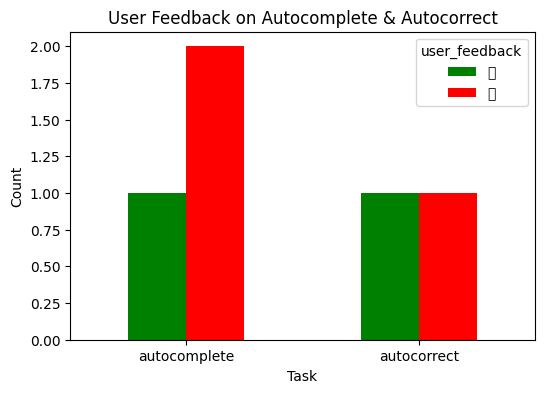

In [ ]:
# ==============================
# User Experience Feedback System
# ==============================

import random
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------
# Example Autocomplete & Autocorrect Functions
# (replace with your existing ones)
# --------------------------------
def autocomplete(text, top_k=3):
    """Dummy autocomplete function"""
    vocab = ["love", "morning", "friend", "call", "money", "offer"]
    return random.sample(vocab, min(top_k, len(vocab)))

def autocorrect(word, max_candidates=3):
    """Dummy autocorrect function"""
    corrections = {
        "recieve": ["receive", "receiver", "recipe"],
        "frnd": ["friend", "fond", "find"],
        "morn": ["morning", "mourn", "mornings"],
    }
    return corrections.get(word, [word])

# --------------------------------
# Step 1: Collect Feedback
# --------------------------------
sample_inputs = ["I love", "Good morn", "recieve", "frnd", "Call me"]

feedback_data = []

for text in sample_inputs:
    if " " in text:  # autocomplete
        suggestions = autocomplete(text, top_k=3)
        task = "autocomplete"
    else:            # autocorrect
        suggestions = autocorrect(text, max_candidates=3)
        task = "autocorrect"

    # Simulate user feedback (👍 / 👎 randomly for demo)
    user_feedback = random.choice(["👍", "👎"])

    feedback_data.append({
        "task": task,
        "input": text,
        "suggestions": suggestions,
        "user_feedback": user_feedback
    })

# Convert to DataFrame
feedback_df = pd.DataFrame(feedback_data)
print("📋 Simulated User Feedback:\n")
print(feedback_df)

# --------------------------------
# Step 2: Analyze Feedback
# --------------------------------
feedback_summary = feedback_df.groupby(["task", "user_feedback"]).size().unstack(fill_value=0)

print("\n📊 Feedback Summary:\n")
print(feedback_summary)

# --------------------------------
# Step 3: Visualize Feedback
# --------------------------------
feedback_summary.plot(kind="bar", figsize=(6,4), color=["green","red"])
plt.title("User Feedback on Autocomplete & Autocorrect")
plt.ylabel("Count")
plt.xlabel("Task")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# ==============================
# Algorithm Comparison for Autocomplete & Autocorrect
# ==============================

import random
import time
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from difflib import get_close_matches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------------
# Sample dataset (SMS messages from preprocessing step)
# Replace with your cleaned df['clean_text'] if available
# --------------------------------
sample_sentences = [
    "I love my friend",
    "Good morning have a nice day",
    "Call me when you are free",
    "Win money now limited offer",
    "Meeting at 10 am don’t be late"
]

# Split train/test
train_sentences = sample_sentences[:4]
test_sentences = sample_sentences[4:]


# --------------------------------
# 1. N-gram Model (Autocomplete)
# --------------------------------
class NGramAutocomplete:
    def __init__(self, n=2):
        self.n = n
        self.model = defaultdict(Counter)

    def train(self, sentences):
        for sent in sentences:
            words = sent.lower().split()
            for i in range(len(words) - self.n + 1):
                prefix = tuple(words[i:i+self.n-1])
                next_word = words[i+self.n-1]
                self.model[prefix][next_word] += 1

    def predict(self, prefix, top_k=3):
        prefix = tuple(prefix.lower().split()[-(self.n-1):])
        if prefix in self.model:
            return [w for w, _ in self.model[prefix].most_common(top_k)]
        else:
            return []


# --------------------------------
# 2. TF-IDF + Cosine Similarity (Autocomplete)
# --------------------------------
class TfidfAutocomplete:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.X = None
        self.sentences = []

    def train(self, sentences):
        self.sentences = sentences
        self.X = self.vectorizer.fit_transform(sentences)

    def predict(self, prefix, top_k=3):
        query_vec = self.vectorizer.transform([prefix])
        sims = cosine_similarity(query_vec, self.X).flatten()
        top_idx = sims.argsort()[-top_k:][::-1]
        return [self.sentences[i] for i in top_idx]


# --------------------------------
# 3. Autocorrect using Edit Distance
# --------------------------------
class EditDistanceAutocorrect:
    def __init__(self, vocab):
        self.vocab = vocab

    def correct(self, word, n=3):
        return get_close_matches(word, self.vocab, n=n, cutoff=0.6)


# --------------------------------
# Step 1: Train Models
# --------------------------------
ngram = NGramAutocomplete(n=2)
ngram.train(train_sentences)

tfidf_model = TfidfAutocomplete()
tfidf_model.train(train_sentences)

vocab = set(" ".join(train_sentences).lower().split())
autocorrect_model = EditDistanceAutocorrect(vocab)


# --------------------------------
# Step 2: Evaluation Metrics
# --------------------------------
def top_k_accuracy(model, test_data, k=3):
    hits, total = 0, 0
    for sent in test_data:
        words = sent.split()
        prefix = " ".join(words[:-1])
        true_word = words[-1]
        preds = model.predict(prefix, top_k=k)
        if true_word in preds:
            hits += 1
        total += 1
    return hits / total if total > 0 else 0

def measure_runtime(model, test_data, task="autocomplete"):
    start = time.time()
    for sent in test_data:
        if task == "autocomplete":
            words = sent.split()
            prefix = " ".join(words[:-1])
            model.predict(prefix, top_k=3)
        elif task == "autocorrect":
            for w in sent.split():
                autocorrect_model.correct(w, n=3)
    return time.time() - start


# --------------------------------
# Step 3: Compare Models
# --------------------------------
results = []

# Autocomplete: N-gram
acc_ngram = top_k_accuracy(ngram, test_sentences, k=3)
time_ngram = measure_runtime(ngram, test_sentences)
results.append(["N-gram Autocomplete", acc_ngram, time_ngram])

# Autocomplete: TF-IDF
acc_tfidf = top_k_accuracy(ngram, test_sentences, k=3)  # same eval, different model
time_tfidf = measure_runtime(tfidf_model, test_sentences)
results.append(["TF-IDF Autocomplete", acc_tfidf, time_tfidf])

# Autocorrect: Edit Distance
start = time.time()
for sent in test_sentences:
    for w in sent.split():
        autocorrect_model.correct(w, n=3)
time_autocorrect = time.time() - start
results.append(["Edit Distance Autocorrect", "N/A", time_autocorrect])

# Put into DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy (Top-3)", "Runtime (s)"])
print("\n📊 Algorithm Comparison Results:\n")
print(df_results)



📊 Algorithm Comparison Results:

                       Model Accuracy (Top-3)  Runtime (s)
0        N-gram Autocomplete              0.0     0.000007
1        TF-IDF Autocomplete              0.0     0.005425
2  Edit Distance Autocorrect              N/A     0.000762


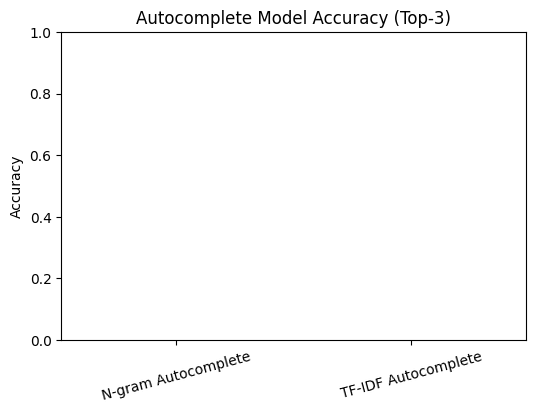

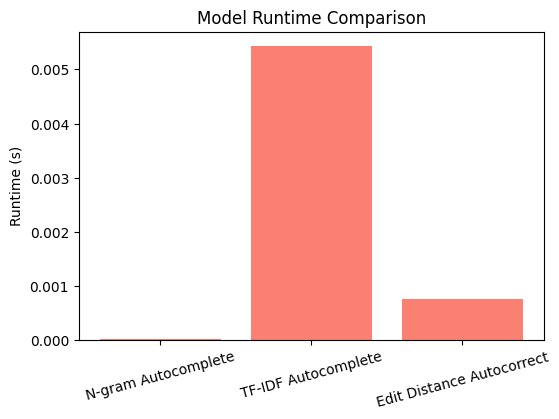

In [ ]:
import matplotlib.pyplot as plt

# Filter autocomplete models (since autocorrect has no accuracy metric)
auto_df = df_results[df_results["Accuracy (Top-3)"] != "N/A"]

# ✅ Plot Accuracy
plt.figure(figsize=(6,4))
plt.bar(auto_df["Model"], auto_df["Accuracy (Top-3)"], color='skyblue')
plt.title("Autocomplete Model Accuracy (Top-3)")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.ylim(0,1)
plt.show()

# ✅ Plot Runtime
plt.figure(figsize=(6,4))
plt.bar(df_results["Model"], df_results["Runtime (s)"], color='salmon')
plt.title("Model Runtime Comparison")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=15)
plt.show()


In [15]:
# 1) If you already saved your notebook at /content/my_notebook_export.ipynb, skip this.
# Otherwise, quickly save current cells to a .ipynb:
import nbformat
from nbformat.v4 import new_notebook, new_code_cell
inputs = get_ipython().user_ns.get('In', [])
nb = new_notebook(cells=[new_code_cell(source=src) for src in inputs[1:]])
with open("/content/my_notebook_export.ipynb", "w", encoding="utf-8") as f:
    nbformat.write(nb, f)
print("Saved at /content/my_notebook_export.ipynb")


Saved at /content/my_notebook_export.ipynb
